In [ ]:
# Darktheme: (Terminal)
# https://medium.com/@rbmsingh/making-jupyter-dark-mode-great-5adaedd814db
# pip3 install jupyterthemes --no-binary :all:
# jt -t monokai -f fira -fs 13 -nf ptsans -nfs 11 -N -kl -cursw 5 -cursc r -cellw 95% -T

In [1]:
library(ggplot2) 
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Download first time
# download.file("https://go.gv.at/l9kaufpreissammlungliegenschaften", "./Preise.csv")

In [3]:
# Einlesen: 2 Dinge zu beachten: 
# German; Windows-enkodiert 
preise <- read.csv2("./Preise.csv", fileEncoding = "windows-1252")

In [4]:
dim(preise)

[1] 55954    47

In [5]:
# Bereinigung Spaltennamen 
colnames(preise) <- gsub("^X", "", gsub("\\.", "", colnames(preise)))

In [6]:
head(preise)

,KGCode,Katastralgemeinde,EZ,PLZ,Straße,ON,Gst,GstFl,ErwArt,Erwerbsdatum,⋯,Baureifgest,Widmung,Baurecht,Bis,aufEZ,Stammeinlage,sonst_wid,sonst_wid_prz,berKaufpreis,Bauzins
,<int>,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,⋯,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>
1,1107,Simmering,2357,1100,BATTIGGASSE,44,582/7,426,Kaufvertrag,04.11.1987,⋯,FALSCH,100,FALSCH,,,FALSCH,,,2180,
2,1103,Kaiserebersdorf,1050,1110,SIMMERINGER HAUPTSTR,437,2143/3,642,Kaufvertrag,21.05.1987,⋯,FALSCH,100,FALSCH,,,FALSCH,,,58138,
3,1103,Kaiserebersdorf,1858,1110,NEUGEBÄUDESTRASSE,LOS 267,742/267,300,Kaufvertrag,03.12.1987,⋯,FALSCH,100,FALSCH,,,FALSCH,,,65406,
4,1103,Kaiserebersdorf,467,1110,HÖRTENGASSE,NEBEN 90,529,4112,Kaufvertrag,02.03.1988,⋯,FALSCH,100,FALSCH,,,FALSCH,,,67237,
5,1103,Kaiserebersdorf,895,1110,LEBERWEG,,1587/1,7159,Kaufvertrag,11.12.1987,⋯,FALSCH,100,FALSCH,,,FALSCH,,,182093,
6,1103,Kaiserebersdorf,1730,1110,AILECGASSE,,2040,375,Kaufvertrag,17.12.1987,⋯,FALSCH,100,FALSCH,,,FALSCH,,,8721,


In [7]:
# Datenfelderbeschreibung
# https://www.data.gv.at/katalog/dataset/kaufpreissammlung-liegenschaften-wien
# KG.Code = Katastralgemeindenummer
# Katastralgemeinde = Katastralgemeindename
# EZ = Einlagezahl
# PLZ = Postleitzahl
# ON = Orientierungsnummer
# Gst. = Grundstücksnummer
# Gst.Fl. = Grundstücksfläche
# ErwArt = Erwerbsart (Kaufvertrag, Gemeinderatsbeschluss, etc.)
# Schutzzone, Wohnzone, ÖZ, Bausperre: FALSCH=nein, WAHR=ja
# parz.: J=parzelliert, N=unparzelliert
# VeräußererCode und Erwerbercode siehe nachstehende Legende
# Anteile, Zähler, Nenner = Eigentumsanteile
# BJ = Baujahr
# TZ = Tagebuchzahl
# €/m² Gfl. = Kaufpreis pro m² Grundfläche in EUR
# Baureifgest: FALSCH=keine Baureifgestaltung, WAHR=Baureifgestaltung
# % Widmung = Anteil/Ausmaß der angegebenen Widmung in %
# Baurecht: FALSCH=kein Baurecht, WAHR=Baurecht
# Stammeinlage: FALSCH=keine Stammeinlage, WAHR=Stammeinlage
# sonst_wid = sonstige Widmung
 #sonst_wid_prz = Anteil der sonstigen Widmung in % Erwerber, Veräußerer: Code 1, 2, 4, 5, 6, 7, 10, 11, 12, 14: 
# Gebietskörperschaften und juristische Personen mit öffentlichem Charakter (Bsp. Gemeinden, Länder, Bund, Wiener Stadtwerke, ÖBB, etc.) 
# Code 3 gemeinnützige Bauvereinigungen (Bsp. Genossenschaften) 
# Code 8 juristische Personen des Privatrechtes (Bsp. GmbH, OEG, KG, AG usw.) 
# Code 9 Privatperson Code 13 Bescheid Adressaten (Bsp. Geldleistung/Ersatzleistung... aufgrund eines Bescheides im Zuge einer Bauplatzschaffung gemäß Bauordnung) 

Wie man sieht, stimmt die Datenfelderbeschreibung nicht mit den Spalten überein. Das ist leider häufig so bei OpenGovernment-Daten.

In [8]:
colnames(preise)

[1] "KGCode"            "Katastralgemeinde" "EZ"               
 [4] "PLZ"               "Straße"            "ON"               
 [7] "Gst"               "GstFl"             "ErwArt"           
[10] "Erwerbsdatum"      "Widmung"           "Bauklasse"        
[13] "Gebäudehöhe"       "Bauweise"          "Zusatz"           
[16] "Schutzzone"        "Wohnzone"          "öZ"               
[19] "Bausperre"         "seitbis"           "zuordnung"        
[22] "Geschoße"          "parz"              "VeräußererCode"   
[25] "Erwerbercode"      "Zähler"            "Nenner"           
[28] "BJ"                "TZ"                "Kaufpreis"        
[31] "mGfl"              "AbbruchfixEU"      "mAbbruch"         
[34] "AbbruchkostEU"     "FreimachfixEU"     "Freimachfläche"   
[37] "FreimachkostEU"    "Baureifgest"       "Widmung"          
[40] "Baurecht"          "Bis"               "aufEZ"            
[43] "Stammeinlage"      "sonst_wid"         "sonst_wid_prz"    
[46] "berKaufpreis"      "Bauzins"

In [9]:
# Datenqualität Baujahr - naja
summary(preise$BJ, )

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0     0.0     0.0   907.4  1900.0 20112.0   19383 

In [10]:
# Mögliche Fragestellungen: 
# Kaufpreis pro Bezirk 
# Gebäudehöhe 
# Widmung 

In [11]:
# Widmung ist zu komplex - hier bräuchte man eine Referenz
preise$Widmung

[1] WI/GBI       WI/GBI       GS           L            L           
    [6] L            WIV/GBIV     WIV/GBIV     WI/GBI       WI/GBI      
   [11] WI/GBI       WI/GBI       BG/IG        WI/GBI       WI/GBI      
   [16] WI/GBI       WI/GBI       WI/GBI       WI/GBI       WIV/GBIV    
   [21] WIV/GBIV     WI/GBI       WIV/GBIV     WIV/GBIV     WIV/GBIV    
   [26] WV/GBV       WIV/GBIV     BG/IG        WIV/GBIV     WIV/GBIV    
   [31] L            WI/GBI       WI/GBI       WI/GBI       BG/IG       
   [36] WI/GBI       WI/GBI       WIII/GBIII   WI/GBI       WI/GBI      
   [41] WI/GBI       WII/GBII     WIII/GBIII   SWW          SWW         
   [46] WIV/GBIV     WI/GBI       WIII/GBIII   WI/GBI       WIII/GBIII  
   [51] WIII/GBIII   WI/GBI       WI/GBI       WI/GBI       WVI/GBVI    
   [56] WIV/GBIV     WIII/GBIII   WIV/GBIV     WI/GBI       WI/GBI      
   [61] WI/GBI       WII/GBII     L            Verkehrsband WI/GBI      
   [66] WI/GBI       BG/IG        WIII/GBIII   EPK          WIII/GBIII  
   [71] WII/GBII     WIII/GBIII   WI/GBI       WIII/GBIII   BG/IG       
   [76] BG/IG        WIII/GBIII   WIII/GBIII   SO/sonstiges WI/GBI      
   [81] WIII/GBIII   WIII/GBIII   WIV/GBIV     WII/GBII     WI/GBI      
   [86] WIII/GBIII   WIII/GBIII   WI/GBI       WIII/GBIII   WII/GBII    
   [91] WI/GBI       WIII/GBIII   WIII/GBIII   WIII/GBIII   WI/GBI      
   [96] WI/GBI       WI/GBI       GS           L            EKLW        
  [101] WI/GBI       WI/GBI       WI/GBI       WI/GBI       WI/GBI      
  [106] WI/GBI       WI/GBI       WIV/GBIV     GS           BG/IG       
  [111] WIII/GBIII   WI/GBI       WIV/GBIV     WI/GBI       WI/GBI      
  [116] WI/GBI       WI/GBI       WI/GBI       WI/GBI       WI/GBI      
  [121] WI/GBI       WI/GBI       WI/GBI       WI/GBI       WIII/GBIII  
  [126] WI/GBI       WI/GBI       WI/GBI       WIII/GBIII   GS          
  [131] BG/IG        BG/IG        WIII/GBIII   WV/GBV       WV/GBV      
  [136] WV/GBV       WII/GBII     WI/GBI       WI/GBI       WI/GBI      
  [141] WI/GBI       WI/GBI       BG/IG        WI/GBI       WI/GBI      
  [146] BG/IG        WI/GBI       WI/GBI       WII/GBII     WII/GBII    
  [151] WI/GBI       WI/GBI       BG/IG        WIII/GBIII   WI/GBI      
  [156] BG/IG        BG/IG        GS           WI/GBI       WI/GBI      
  [161] WI/GBI       WI/GBI       WI/GBI       BG/IG        BG/IG       
  [166] BG/IG        BG/IG        WI/GBI       WI/GBI       WI/GBI      
  [171] WI/GBI       WI/GBI       WI/GBI       WIV/GBIV     WI/GBI      
  [176] WI/GBI       WIV/GBIV     WIV/GBIV     L            WIV/GBIV    
  [181] WIV/GBIV     WIII/GBIII   WIV/GBIV     WI/GBI       BG/IG       
  [186] WIII/GBIII   WIV/GBIV     WV/GBV       GS           WIII/GBIII  
  [191] WIII/GBIII   BG/IG        WIII/GBIII   WII/GBII     WI/GBI      
  [196] WI/GBI       WI/GBI       WI/GBI       BG/IG        WI/GBI      
  [201] WI/GBI       WIV/GBIV     EPK          WI/GBI       WI/GBI      
  [206] BG/IG        BG/IG        WI/GBI       BG/IG        WI/GBI      
  [211] WI/GBI       WI/GBI       GS           WI/GBI       WIII/GBIII  
  [216] ESP          SWW          SWW          WI/GBI       L           
  [221] WI/GBI       WI/GBI       WI/GBI       WI/GBI       WI/GBI      
  [226] WI/GBI       WI/GBI       WI/GBI       WI/GBI       WI/GBI      
  [231] WI/GBI       Epk          W            GB           W           
  [236] W            GB           W            W            W           
  [241] WI/GBI       WI/GBI       WII/GBII     WI/GBI       WI/GBI      
  [246] WI/GBI       BG/IG        WI/GBI       WI/GBI       BG/IG       
  [251] WI/GBI       BG/IG        WI/GBI       BG/IG        BG          
  [256] WIV/GBIV     WIV/GBIV     WIV/GBIV     WI/GBI       WI/GBI      
  [261] WIV/GBIV     WI/GBI       WI/GBI       Friedhof     BG/IG       
  [266] BG/IG        WI/GBI       WI/GBI       WI/GBI       WI/GBI      
  [271] GB           GB           Sww          GB           GB

In [12]:
str(preise)

'data.frame':	55954 obs. of  47 variables:
 $ KGCode           : int  1107 1103 1103 1103 1103 1103 1101 1009 1806 1806 ...
 $ Katastralgemeinde: Factor w/ 89 levels "Albern","Alsergrund",..: 75 39 39 39 39 39 15 49 50 50 ...
 $ EZ               : int  2357 1050 1858 467 895 1730 315 794 1216 38 ...
 $ PLZ              : int  1100 1110 1110 1110 1110 1110 1100 1060 1230 1230 ...
 $ Straße           : Factor w/ 9192 levels "","1.HAIDEQUERSTRASSE",..: 694 7624 5754 3556 4838 95 1836 5022 5142 5347 ...
 $ ON               : Factor w/ 3293 levels "","(1-11)","(37)",..: 1738 1734 2919 3009 1 1 2363 241 779 2414 ...
 $ Gst              : Factor w/ 28385 levels "",",123/1",":28/9",..: 22089 10382 24935 20940 7352 9766 19480 26053 7460 15422 ...
 $ GstFl            : int  426 642 300 4112 7159 375 500 1789 1170 1063 ...
 $ ErwArt           : Factor w/ 11 levels "Baurechtsvertrag",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Erwerbsdatum     : Factor w/ 9005 levels "","01.01.1990",..: 1073 6016 798 275 3160 

In [13]:
colnames(preise)[duplicated(colnames(preise))] <- "Widmung2"

In [14]:
# Höhe (auf Bezirks- oder Katastralebene) spannend; Daten eher unsauber
preise$Gebäudehöhe

[1]                                                                      
    [8]                                                                      
   [15]                                                                      
   [22]                                                                      
   [29]                                                                      
   [36]                                                                      
   [43]                                                                      
   [50]                                                                      
   [57]                                                                      
   [64]                                                                      
   [71]                                                                      
   [78]                                                                      
   [85]                                                                      
   [92]                                                                      
   [99]                                                                      
  [106]                                                                      
  [113]                                                                      
  [120]                                                                      
  [127]                                                                      
  [134]                                                                      
  [141]                                                                      
  [148]                                                                      
  [155]                                                                      
  [162]                                                                      
  [169]                                                                      
  [176]                                                                      
  [183]                                                                      
  [190]                                                                      
  [197]                                                                      
  [204]                                                                      
  [211]                                                                      
  [218]                                                                      
  [225]                                                                      
  [232]                               6,5       6,5                          
  [239]                                                                      
  [246]                                                                      
  [253]                                                                      
  [260]                                                                      
  [267]                                                   4,5                
  [274] 13,5                                                                 
  [281]                                                                      
  [288]                                                                      
  [295]                                                                      
  [302]                                                                      
  [309]                                                                      
  [316]                                                                      
  [323]                                                                      
  [330]                                                                      
  [337]                                                                      
  [344]                                                                      
  [351]                                                                      
  [358]                   

In [15]:
preise$berKaufpreis

[1]      2180     58138     65406     67237    182093      8721     61772
    [8]    127177     59592     83574     72673     14535   1369883     72673
   [15]     29069     92294    159880    159880     50871     80463     10901
   [22]     43604    254355    363364     32703    459682    130811   3486061
   [29]    650422    962915    193858     60318     37790     89388      1076
   [36]      1817     72673    617719     47237    109009     43604    450572
   [43]    393110     50155    163514    986897    868440     65406    523244
   [50]    102061     97382    239820    178048    109009      4578    406968
   [57]    117367    109022     36336     58138      3815     72673     37325
   [64]      5484    102726     97407    124325     83156     55958     49418
   [71]      3270    399701     23255    290691    247088    203484     72673
   [78]     72673     54505      6541    450572   2268918    188949    305226
   [85]     55086     87207    102839     45057     43604    181682     45784
   [92]    414235     79940    119910    720914      1831    101742     16561
   [99]    210285     30149    116881     43604     69039     79940     72673
  [106]      6541     93021     58138      7994    902887    741554    347921
  [113]    116277     18168     42877     36336     29814     29705     29705
  [120]     28669     29069     37790     33430     65406    145346     36336
  [127]    146799     37935    472373      1589   1916383    494175      9942
  [134]    102105    101851    901143     12296    232553    105376    125513
  [141]    181682     72673    159880    279790     69039    317858     87207
  [148]    107410    159880     15043    290691     20348    176595   1114874
  [155]    181682   3270278    132265     14535     14535     65406     85463
  [162]     14535     58138    399701    134445     25435    911704     62499
  [169]    134445    254355    300430    414235     58138     72673     25435
  [176]      1308     90841     61772     21802    109009     86466    389650
  [183]    123544       992      2191    192863    719527    828470     31249
  [190]    413072    122643      3663     87207     53160     49418    211769
  [197]   1666533     43604    290891    218018    218018    225286      5232
  [204]     63225     24418     21845     72673    134445    210751     32703
  [211]     54505     19985     15622     48691     40697     29069     12265
  [218]     15819     71219     12231     42150     38517     50871     63952
  [225]    115913    205228    206027      3634    109009     71946     18168
  [232]    262493   3500000    843703    505000    450000   1400000    410000
  [239]    180000    770000     47237     36336     50871    336112    203484
  [246]     87207    973816     69039     36336     36336     10901      8102
  [253]   1105717      9942     10000    170781    438944    297959     45275
  [260]     32703     23982     60135     72673     21569     46947    615100
  [267]    254355     23255     79940    159880    946000    455000     10355
  [274]    161840    650000    472373    119910     47237     72673     35246
  [281]     35246     35246   2434540     43604     58138     72673    105376
  [288]    667137     50871     65406    132068   1475237    507082      1163
  [295]    570772      6124     39970     36743     59689    578403     87207
  [302]     29069     40457     36336    109009     26402     37790    145346
  [309]      2907     78123      2907    156301     94475      4360      7267
  [316]    109009     72673     50871     47237     54505    203484     50668
  [323]     18997     54505     67586    626178     22906     21584     25508
  [330]      6613    595917     90309    116277    124271    646788     55013
  [337]    290691    174415    270634     67382    132730     54505     71946
  [344]    345196     50871     19985    181682     10901     50871      2180
  [351]      2154    716895     17441     14535     10174    436037     36336
  [358]     41424    12209

In [20]:
recode <- function(x) {
    y <- as.character(x)
    substr(y, nchar(y), nchar(y)) <- "0"
    return(as.integer(y))
    }

In [21]:
preise$PLZkorr <- (sapply(preise$PLZ,  recode))

bez_plz <- c(paste0(rep(10, 9), seq(10, 90, 10)),
  "1100", 
paste0(rep(11, 9), seq(10, 90, 10)),
c("1200", "1210", "1220", "1230"))

In [24]:
preisfilter <- preise %>% 
filter(mGfl<10000 & GstFl < 20000 & PLZkorr %in% bez_plz)

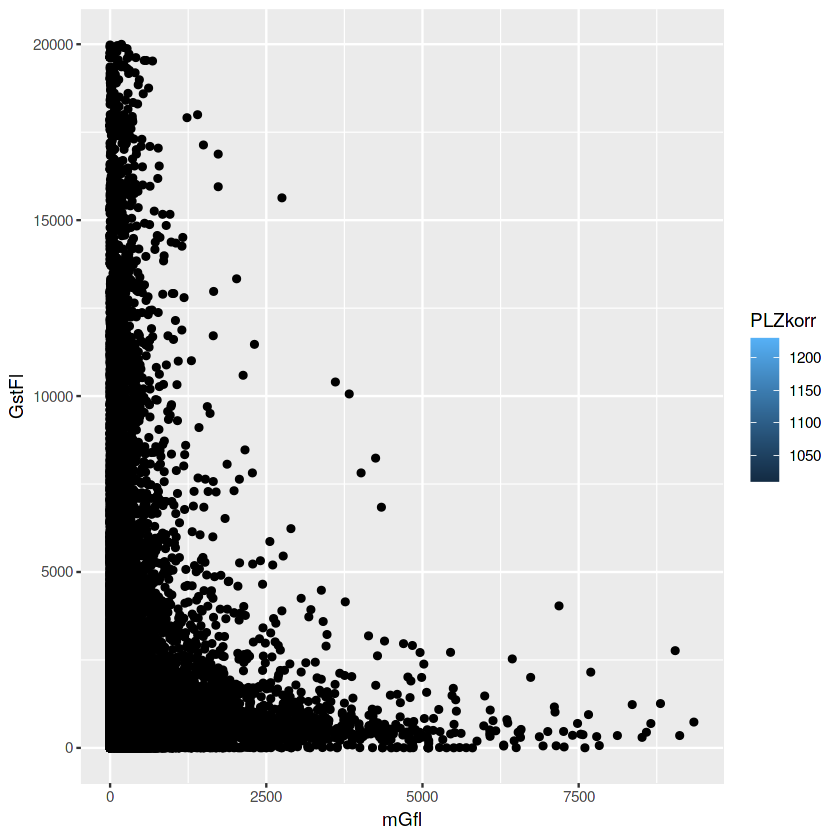

In [25]:
ggplot(preisfilter, aes(x = mGfl, y = GstFl))+
geom_point(aes(fill=PLZkorr))
#plot(preisfilter$mGfl, preisfilter$GstFl)

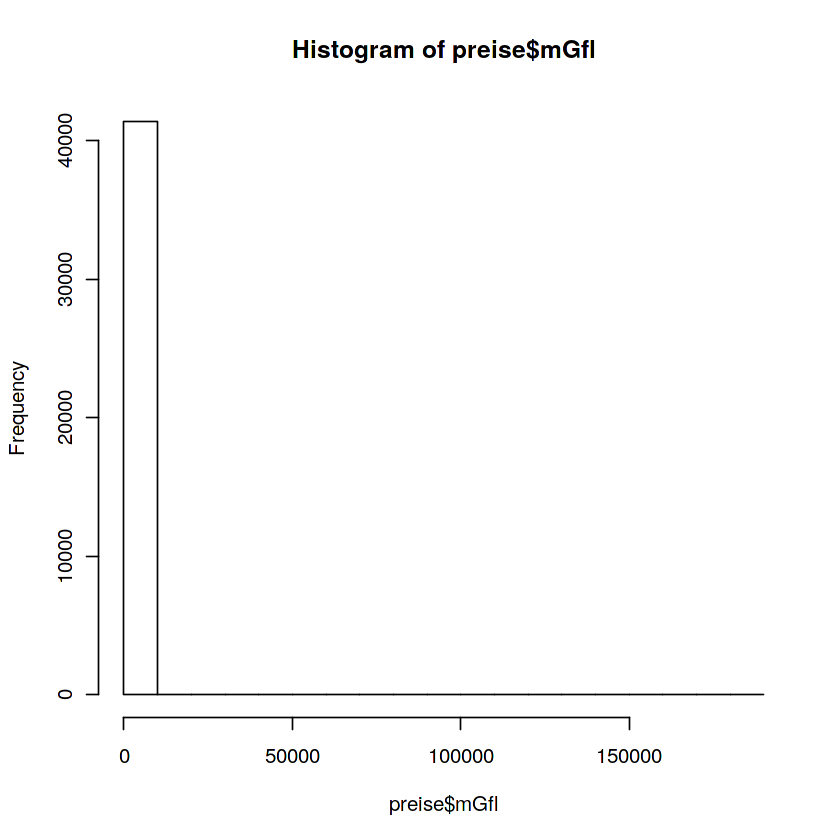

In [26]:
hist(preise$mGfl)

In [27]:
table(preise$BJ, useNA = "always")


    0     1     2     4     5     6     7    76   187   190   195   892  1183 
19313     1     6     1     1     3     2     1     1     1     1     1     1 
 1654  1671  1710  1711  1713  1718  1724  1730  1750  1764  1767  1770  1772 
    1     1     2     1     2     1     1     2     4     2     1     3     5 
 1774  1780  1783  1784  1785  1786  1787  1788  1789  1790  1791  1792  1793 
    1     3     4     3     3     1     1     1     1     3     1     1     2 
 1796  1798  1800  1801  1802  1803  1804  1805  1806  1807  1808  1809  1810 
    1     1    14     5    12     4     3     1     6     2     2     7     7 
 1811  1812  1813  1815  1816  1817  1818  1819  1820  1821  1822  1823  1824 
    7     2     1     1     6     5     6     5    17     6     8     6    19 
 1825  1826  1827  1828  1829  1830  1831  1832  1833  1834  1835  1836  1837 
   22    29    12    25     4    10    13    11     4     8    14    12    11 
 1838  1839  1840  1841  1842  1843  1844  1845  18

In [28]:
preise$BJ_FAKTOR <- ifelse(is.na(preise$BJ), "unbekannt", 
        ifelse(preise$BJ == 0,"unbekannt", 
              ifelse(preise$BJ < 1000, "unwahrscheinlich", 
                    ifelse(preise$BJ < 1800, "vor 1800", 
                        ifelse(preise$BJ < 1900, "vor 1900", 
                            ifelse(preise$BJ < 1950, "vor 1950", 
                                ifelse(preise$BJ < 1975, "vor 1970", 
                                       ifelse(preise$BJ < 2000, "vor 2000",
                                              ifelse(preise$BJ < 2010, "vor 2010", 
                                                     ifelse(preise$BJ < 2015, "vor 2015","Ganz neu"                                      
                ))))))))))

In [30]:
options(repr.plot.width=35, repr.plot.height=25)
plot_obj <- preise %>% 
filter(mGfl < 20000 & PLZkorr %in% bez_plz & BJ < 2025) %>% 
ggplot(aes(y = mGfl, x = factor(as.character(PLZkorr)))) +
geom_bar(stat = "summary", fun=mean) + 
geom_point(aes(colour=BJ_FAKTOR)) + 
facet_grid(BJ_FAKTOR~., scales = "free_y") + 
theme_dark(base_size = 12)

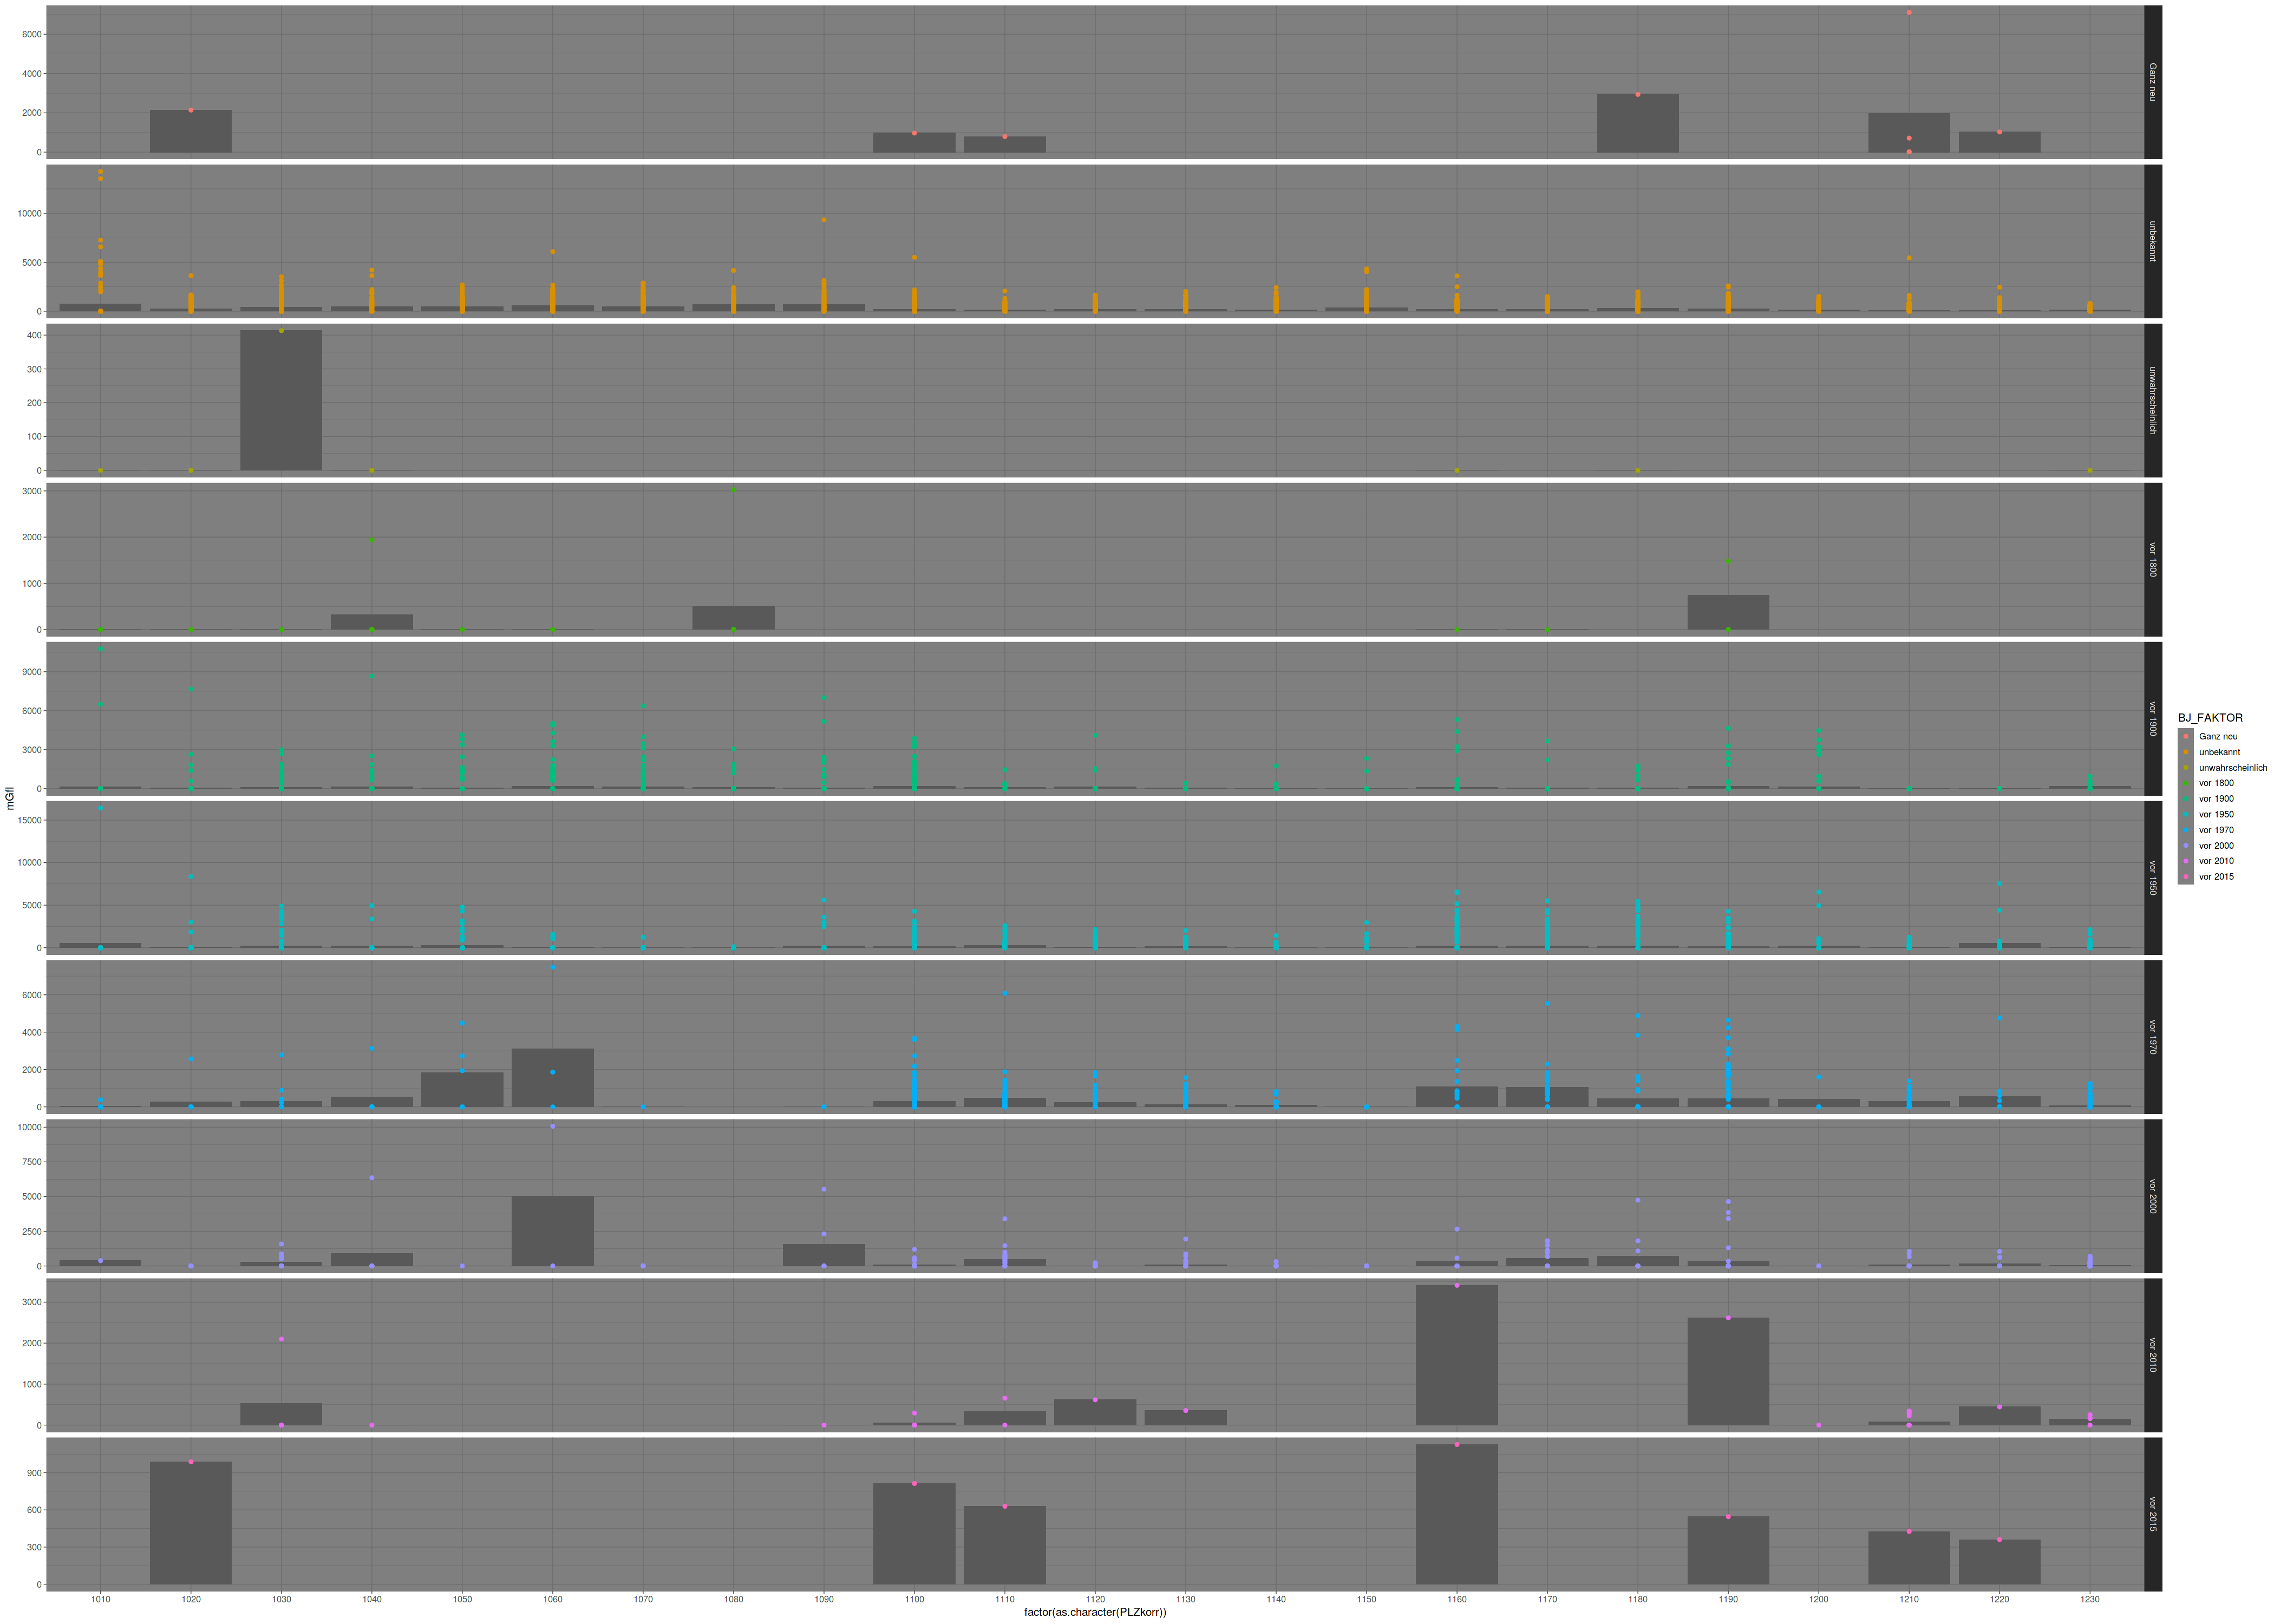

In [31]:
plot_obj

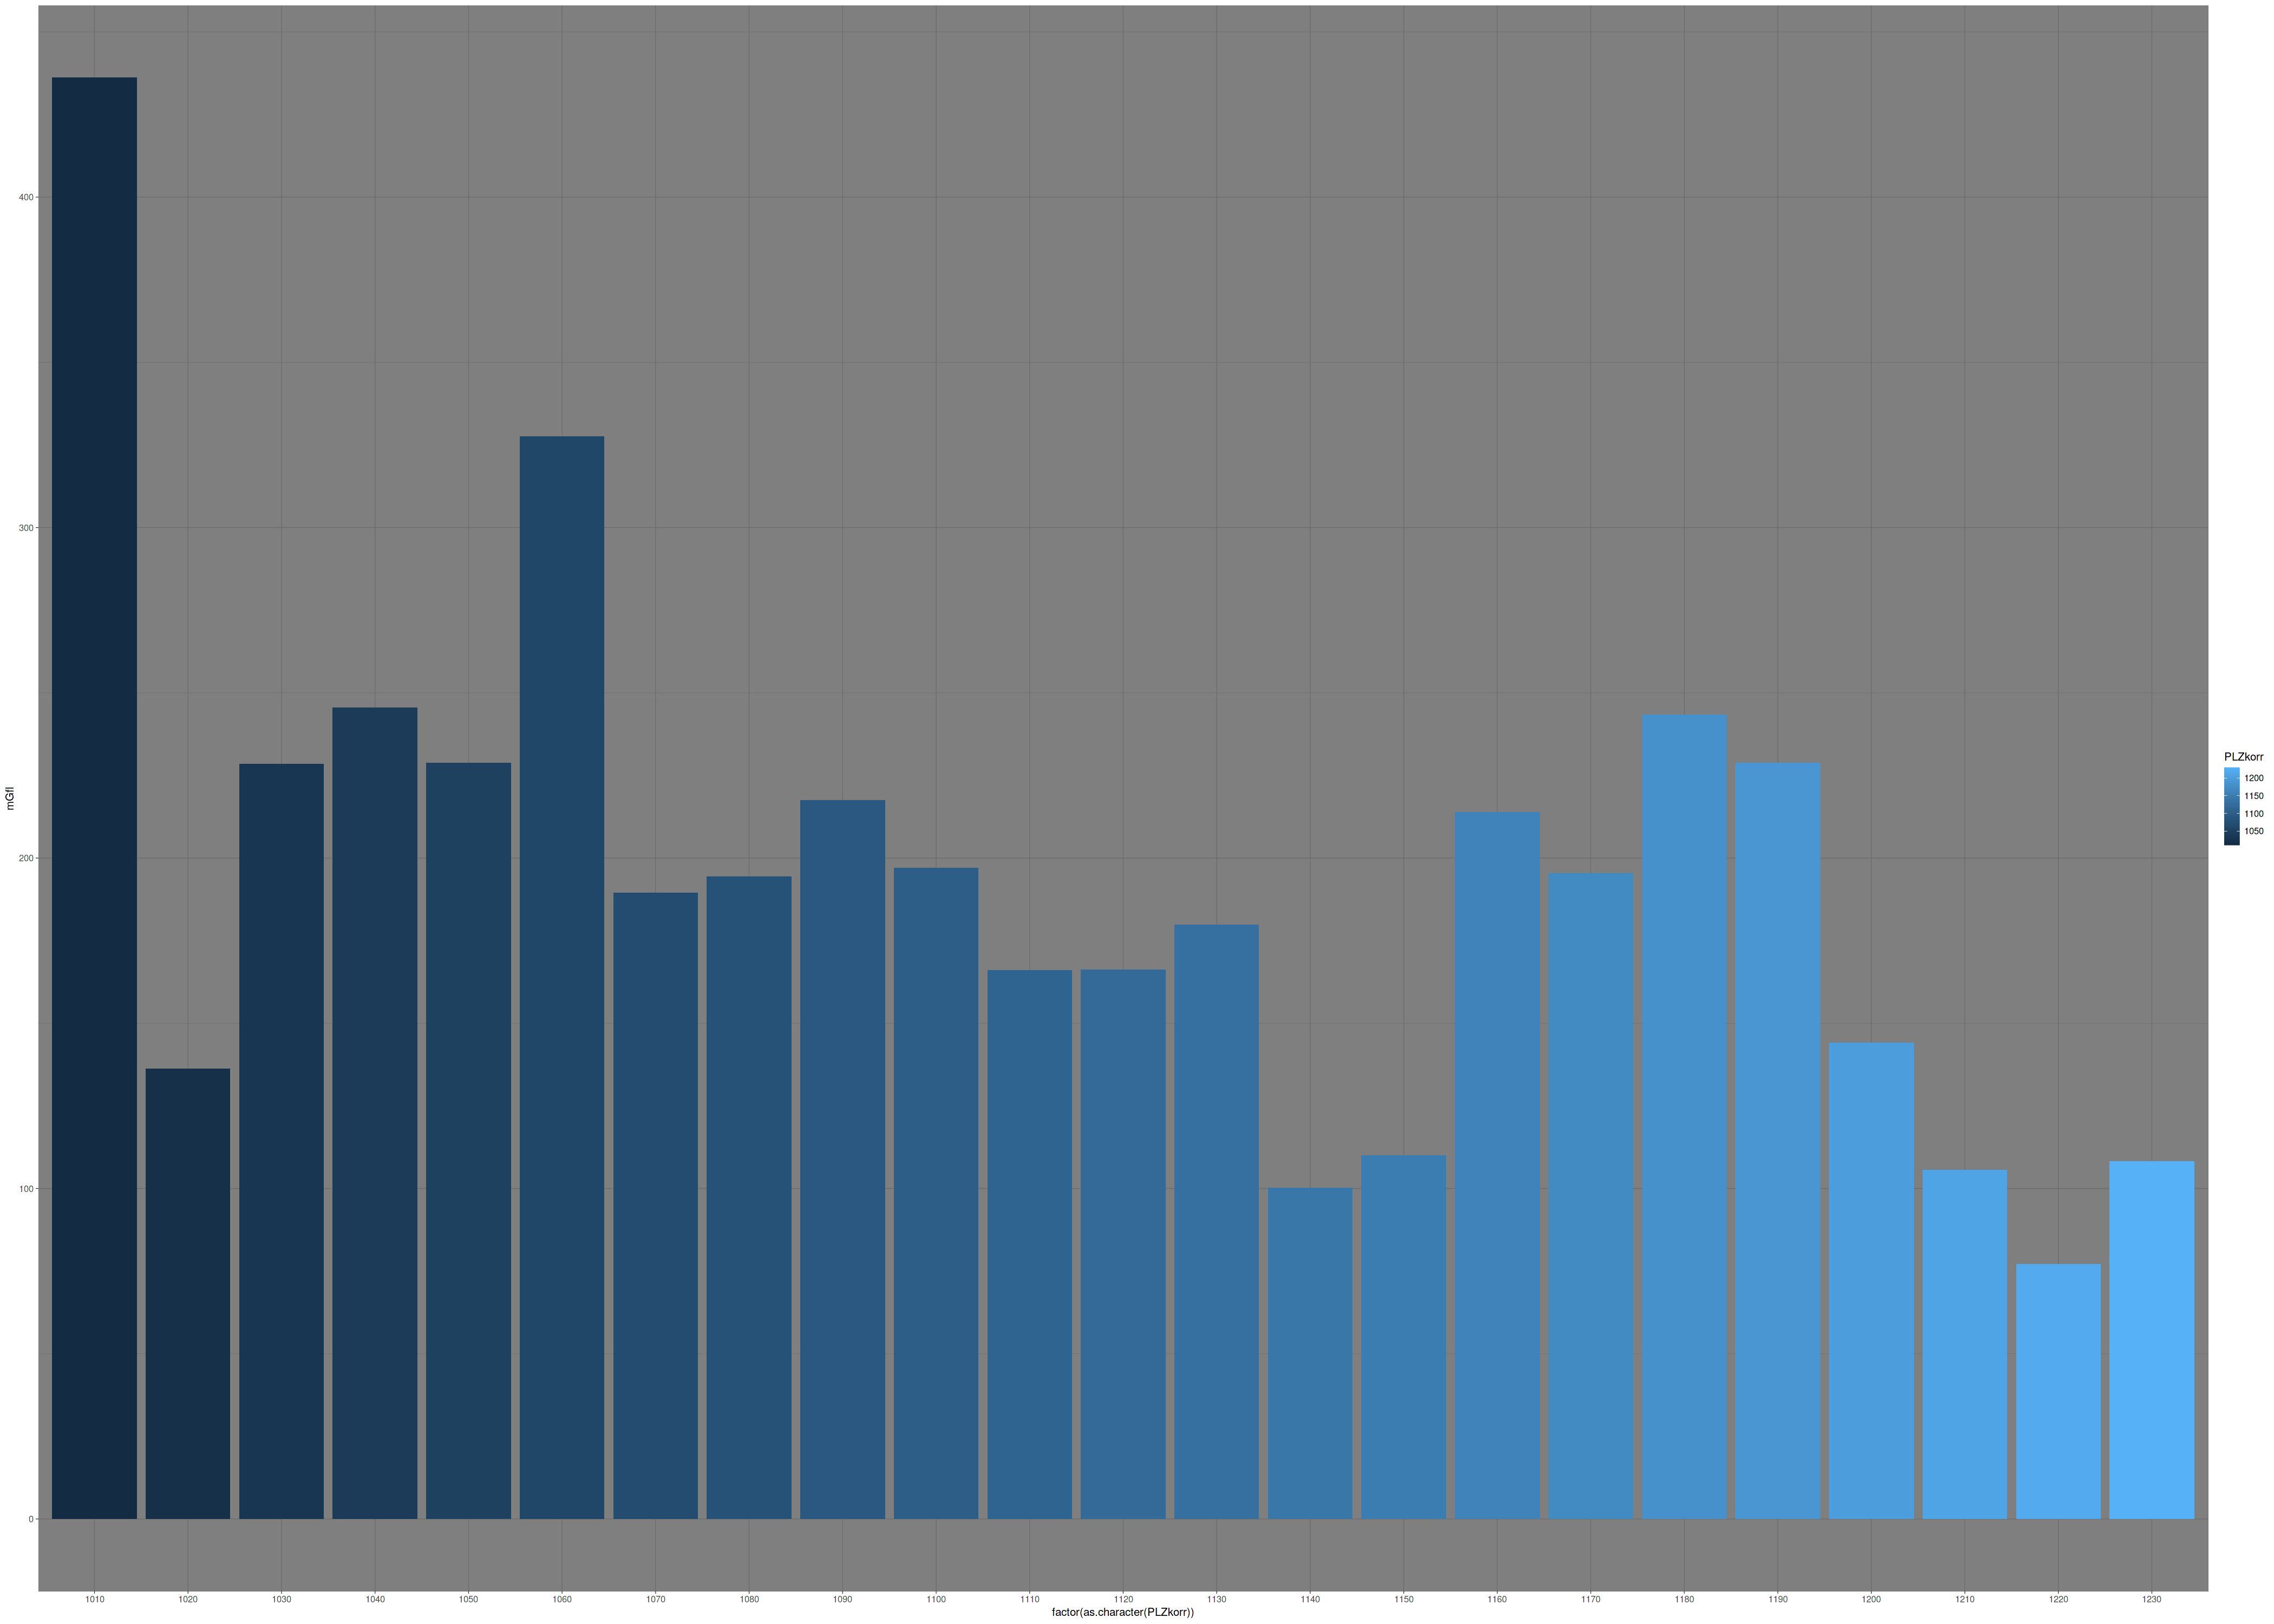

In [32]:
options(repr.plot.width=35, repr.plot.height=25)
preise %>% 
filter(mGfl < 20000 & PLZkorr %in% bez_plz & BJ < 2025) %>% 
ggplot(aes(y = mGfl, x = factor(as.character(PLZkorr)), fill = PLZkorr)) +
geom_bar(stat = "summary", fun=mean) + 
#geom_point(aes(colour=BJ_FAKTOR)) + 
#facet_grid(BJ_FAKTOR~., scales = "free_y") + 
theme_dark(base_size = 12)

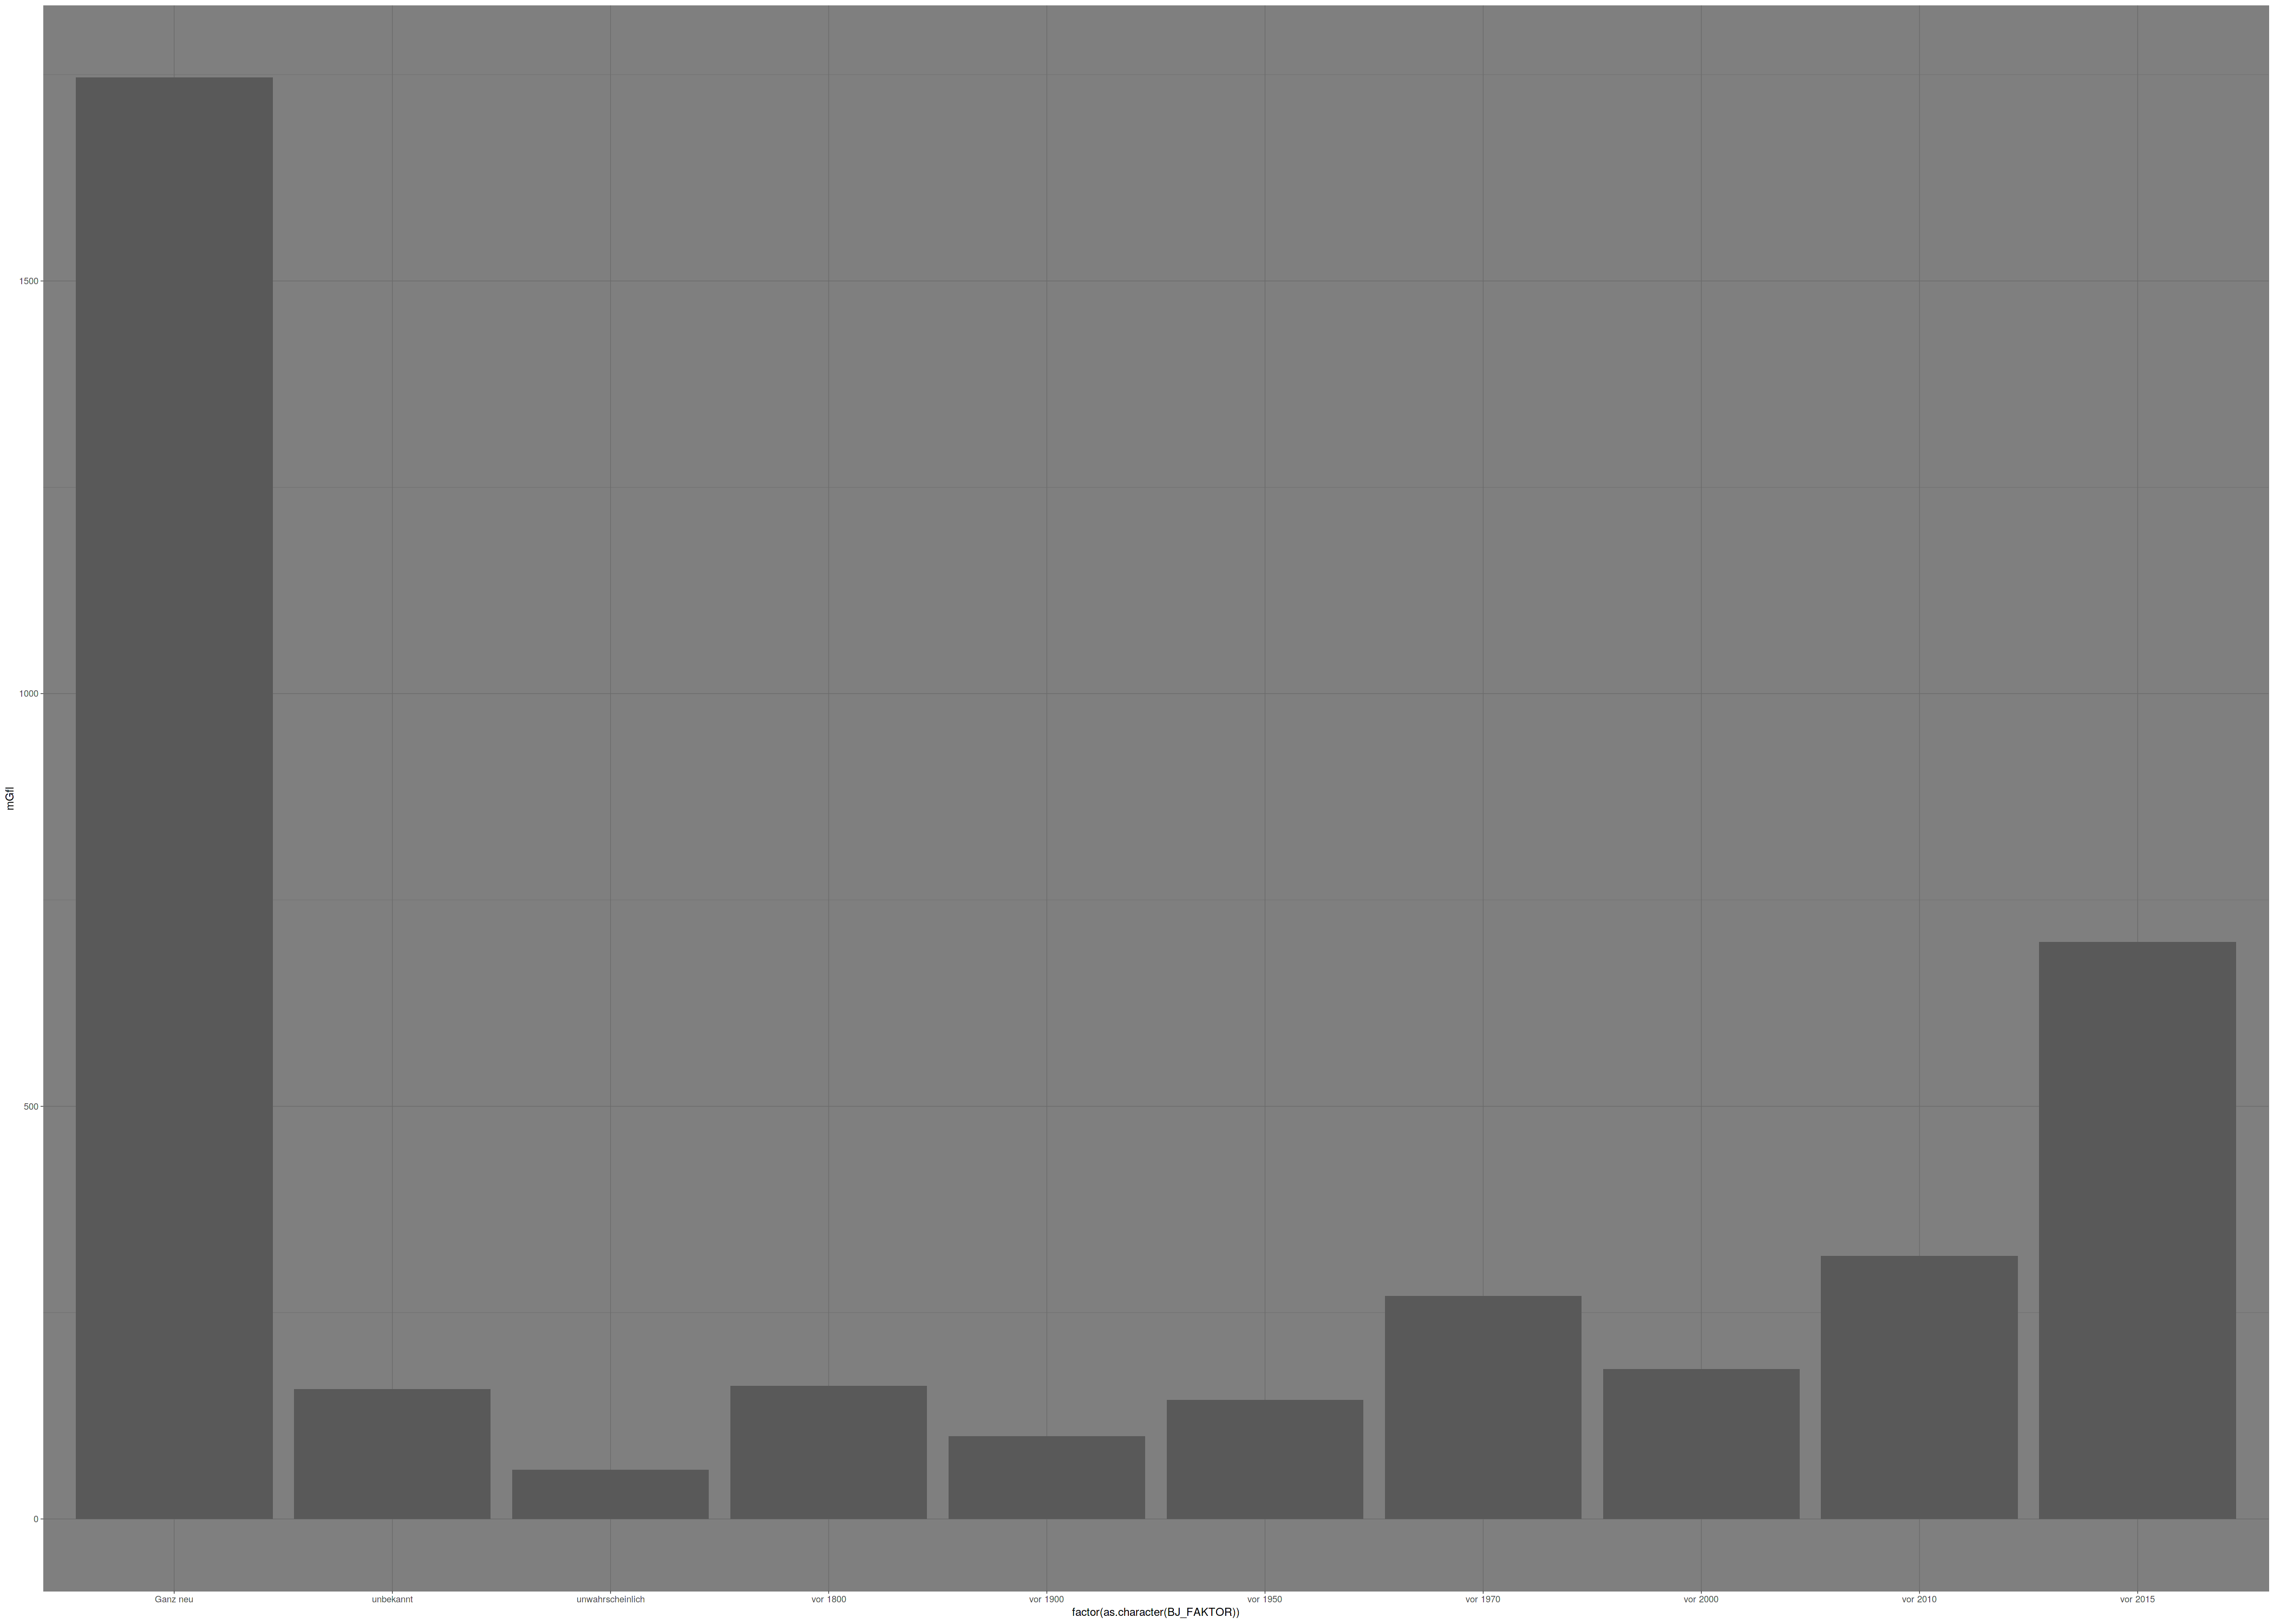

In [33]:
options(repr.plot.width=35, repr.plot.height=25)
preise %>% 
filter(mGfl < 20000 & PLZkorr %in% bez_plz & BJ < 2025) %>% 
ggplot(aes(y = mGfl, x = factor(as.character(BJ_FAKTOR)))) +
geom_bar(stat = "summary", fun=mean) + 
#geom_point(aes(colour=BJ_FAKTOR)) + 
#facet_grid(BJ_FAKTOR~., scales = "free_y") + 
theme_dark(base_size = 12)

In [34]:
plotdat <- as.data.frame(table(preise$BJ_FAKTOR))
colnames(plotdat)

[1] "Var1" "Freq"

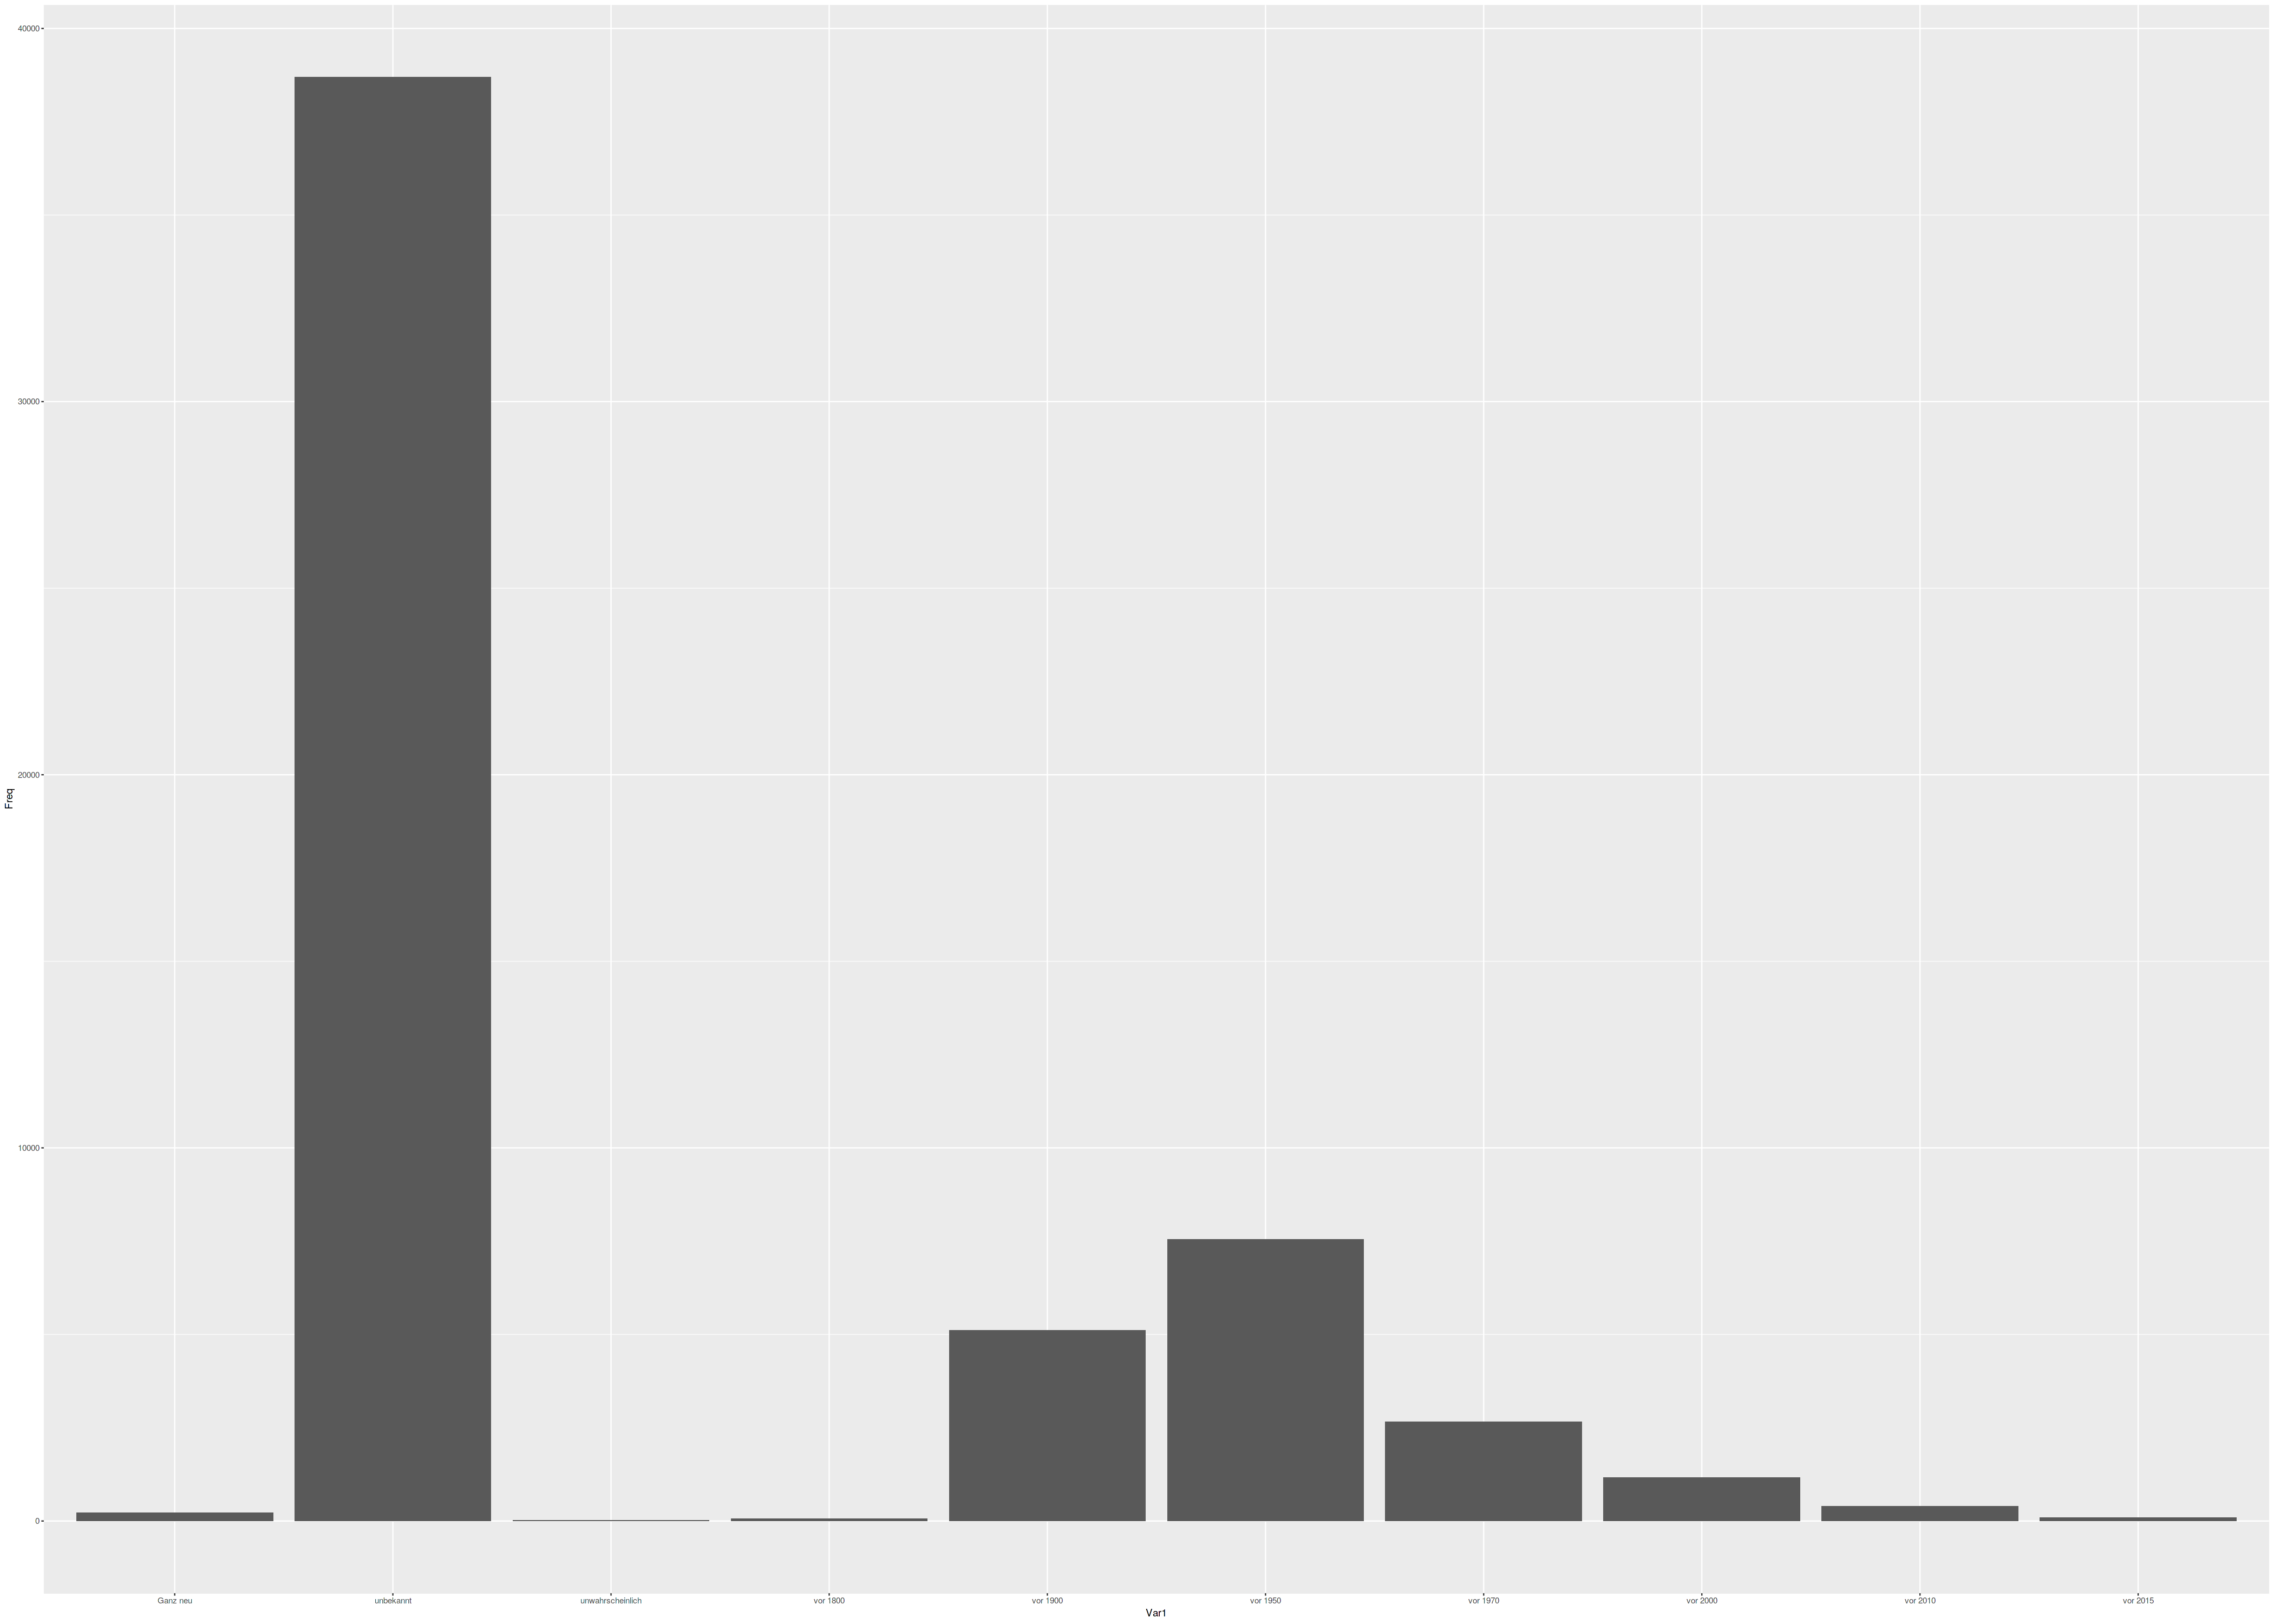

In [35]:
ggplot(plotdat, aes(x = Var1, y = Freq))+
geom_col()

In [36]:
write.csv(preise, "~/Documents/Windows/Preise_korr.csv")